# Explorations

We show how to reproduce key results from:
    
    * Carneiro, P., Heckman, J. J, and Vytlacil, E. (2011). Estimating Marginal Returns to education
    
using the **grmpy** package. They provide their own replication material on the AER website.

In [1]:
from run import plot_est_mte
import pandas as pd
import grmpy

In [3]:
def process_data(data_frame, output_file):
    """This function adds squared and interaction terms to the Cainero data set."""
    # Delete redundant columns\n",
    for key_ in ['newid', 'caseid']:
        del df[key_]

    # Add squared terms
    for key_ in ['mhgc', 'cafqt', 'avurate','lurate_17', 'numsibs', 'lavlocwage17']:    
        str_ = key_ + 'sq'
        df[str_] = df[key_]**2
        
    # Add interaction terms
    for j in ['pub4','lwage5_17' , 'lurate_17', 'tuit4c']:
        for i in ['cafqt', 'mhgc', 'numsibs']:
            df[j + i] = df[j] * df[i] 

    df.to_pickle(output_file +  '.pkl')

## Data Preparation

We do not have access to the exact dataset due to the confidentiality of the geographic information. However, we can create a mock dataset and merge the two datasets at random.

In [4]:
basic = pd.read_stata('basicvariables.dta')
local = pd.read_stata('localvariables.dta') 
df = pd.concat([basic, local], axis = 1)
process_data(df,'aer-replication-mock')

## Estimation


In the next step we replicate the estimation results. For further information about the exact specification see the initialization file "replication.grmpy.ini".

In [5]:
rslt = grmpy.estimate('replication.grmpy.ini')

## MTE Plot

Plot the MTE calculated from the estimated results.

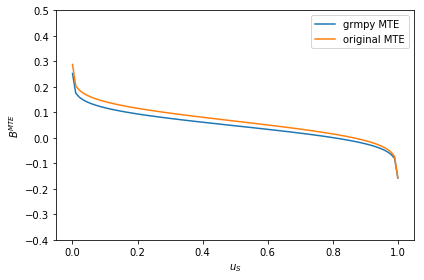

In [6]:
plot_est_mte(rslt, df)